# Proyek Analisis Data: E-commerce Public Dataset
- **Nama:** Muhammad Fahmi Hutomo
- **Email:** mfhutomo@gmail.com / mc702d5y0234@student.devacademy.id
- **ID Dicoding:** Muhammad Fahmi Hutomo

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren pendapatan harian & bulanan di Olist?
- Pertanyaan 2: Produk apa saja yang memperoleh pendapatan besar di Olist?
- Pertanyaan 3: Kota  mana yang mengumpulkan pesanan terbanyak?
- Pertanyaan 4: Metode pembayaran apa yang paling banyak digunakan di Olist?

## Import Semua Packages/Library yang Digunakan

## Data Wrangling

### Gathering Data

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import gdown

file_id = "1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK"
url = f"https://drive.google.com/uc?id={file_id}"
output = "E-Commerce Public Dataset.zip"

gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK
From (redirected): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK&confirm=t&uuid=f38ab089-5a74-4223-96d3-ba5802b13b10
To: /content/E-Commerce Public Dataset.zip
100%|██████████| 44.9M/44.9M [00:00<00:00, 190MB/s]


'E-Commerce Public Dataset.zip'

In [16]:
import zipfile
import os

extract_folder = "ecommerce_dataset"

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

In [22]:
customers = pd.read_csv(os.path.join("ecommerce_dataset", "E-Commerce Public Dataset", "customers_dataset.csv")) #1
geolocation = pd.read_csv(os.path.join("ecommerce_dataset", "E-Commerce Public Dataset", "geolocation_dataset.csv"))  #2
order_items = pd.read_csv(os.path.join("ecommerce_dataset", "E-Commerce Public Dataset", "order_items_dataset.csv"))  #3
order_payments = pd.read_csv("ecommerce_dataset/E-Commerce Public Dataset/order_payments_dataset.csv")  #4
order_reviews = pd.read_csv("ecommerce_dataset/E-Commerce Public Dataset/order_reviews_dataset.csv")  #5
orders = pd.read_csv("ecommerce_dataset/E-Commerce Public Dataset/orders_dataset.csv")  #6
product_category = pd.read_csv("ecommerce_dataset/E-Commerce Public Dataset/product_category_name_translation.csv")  #7
products = pd.read_csv("ecommerce_dataset/E-Commerce Public Dataset/products_dataset.csv")  #8
sellers = pd.read_csv("ecommerce_dataset/E-Commerce Public Dataset/sellers_dataset.csv")  #9

In [24]:
# customers = pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/customers_dataset.csv')  #1
# geolocation = pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/geolocation_dataset.csv')  #2
# order_items = pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/order_items_dataset.csv')  #3
# order_payments = pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/order_payments_dataset.csv')  #4
# order_reviews = pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/order_reviews_dataset.csv')  #5
# orders = pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/orders_dataset.csv')  #6
# product_category = pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/product_category_name_translation.csv')  #7
# products = pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/products_dataset.csv')  #8
# sellers = pd.read_csv('/content/drive/My Drive/E-Commerce Public Dataset/sellers_dataset.csv')  #9


### Read Data

#### customers

In [25]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### geolocation

In [26]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### order_items

In [27]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### order_payments

In [28]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### order_reviews

In [29]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


#### orders

In [30]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### product_category

In [31]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### products

In [32]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### sellers

In [33]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### **Insight:**


- orders(order_id, customer_id) dapat dihubungkan dengan customers(customer_id), order_items(order_id), order_payments(order_id), dan order_reviews(order_id)
- order_items(seller_id, product_id) juga dapat dihubungkan dengan  sellers(seller_id) dan products(product_id)
- products(product_category_name) juga bisa dihubungkan dengan product_category(product_category_name)
- sellers(seller_zip_code_prefix) juga dapat dihubungkan dengan geolocation(geolocation_zip_code_prefix)
- geolocation(geolocation_zip_code_prefix) juga dapat dihubungkan dengan customer(customer_zip_code_prefix)
- nama kolom di dalam tanda kurung () merupakan kolom-kolom yang terdapat pada masing-masing dataframe yang bisa digunakan untuk menghubungkan dua dataframe yang bersesuaian (mempunyai kolom yang sama)

### Dataframe untuk setiap pertanyaan

- Pertanyaan 1: order_items(order_id, price, freight_value), orders(order_id, order_purchase_timestamp, order_status)
- Pertanyaan 2: order_items(product_id, price), products(product_id, product_category_name), product_category(product_category_name, product_category_name_english)
- Pertanyaan 3: olist_orders(customer_id), customers(customer_id, customer_city, customer_state)
- Pertanyaan 4: order_payments(payment_type)

### Assessing Data

#### semua dataframe info

In [34]:
# Daftar DataFrame
dataframes = {
    "customers": customers,
    "geolocation": geolocation,
    "order_items": order_items,
    "order_payments": order_payments,
    "order_reviews": order_reviews,
    "orders": orders,
    "product_category": product_category,
    "products": products,
    "sellers": sellers
}

# Loop untuk mencetak info setiap DataFrame
for name, df in dataframes.items():
    print(f"DataFrame: {name}")
    print(df.info())

    # Menampilkan jumlah nilai null di setiap kolom
    print("\nJumlah Nilai Null (NaN) per Kolom:")
    print(df.isna().sum())

    # Menampilkan jumlah record duplikat
    duplicate_count = df.duplicated().sum()
    print(f"Total Record Duplikat: {duplicate_count}")

    print("-" * 80)  # Pembatas antar DataFrame


DataFrame: customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Jumlah Nilai Null (NaN) per Kolom:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Total Record Duplikat: 0
--------------------------------------------------------------------------------
DataFrame: geolocation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns)

#### customers - OK

In [35]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### geolocation -  ada duplikat

In [36]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [37]:
print("Jumlah duplikasi: ", geolocation.duplicated().sum())

Jumlah duplikasi:  261831


In [38]:
geolocation.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


#### order_items - OK

In [39]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [40]:
print("Jumlah duplikasi: ", order_items.duplicated().sum())

Jumlah duplikasi:  0


In [41]:
order_items.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


#### order_payments - OK

In [42]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [43]:
print("Jumlah duplikasi: ", order_payments.duplicated().sum())

Jumlah duplikasi:  0


In [44]:
order_payments.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


#### order_reviews - null values pada  review_comment_title, review_comment_message

In [45]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [46]:
print("Jumlah duplikasi: ", order_reviews.duplicated().sum())

Jumlah duplikasi:  0


In [47]:
order_reviews.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [48]:
order_reviews.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


#### orders -  null values pada order_approved_at	, order_delivered_carrier_date , order_delivered_customer_date.

In [49]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [50]:
print("Jumlah duplikasi: ", orders.duplicated().sum())

Jumlah duplikasi:  0


In [51]:
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [52]:
orders.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### product_category - OK

In [53]:
product_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [54]:
print("Jumlah duplikasi: ", product_category.duplicated().sum())

Jumlah duplikasi:  0


In [55]:
product_category.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### products - null values kecuali kolom product_id

In [56]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [57]:
print("Jumlah duplikasi: ", products.duplicated().sum())

Jumlah duplikasi:  0


In [58]:
products.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [59]:
products[products.isnull().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


#### sellers - OK

In [60]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [61]:
print("Jumlah duplikasi: ", sellers.duplicated().sum())

Jumlah duplikasi:  0


In [62]:
sellers.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


#### **Insight:**


- Ada dataframe yang recordnya mengandung duplikat, sehingga perlu dilakukan drop duplicates pada bagian data cleaning
- Beberapa dataframe recordnya mengandung missing values sehingga perlu dilakukan imputasi/drop pada bagian data cleaning

### Cleaning Data

#### geolocation - data duplikat dihapus

In [63]:
geolocation = geolocation.drop_duplicates().reset_index(drop=True)

In [64]:
print("Jumlah data duplikat: ", geolocation.duplicated().sum())

Jumlah data duplikat:  0


#### order_reviews - title kosong diisi "tanpa title", message kosong diisi "tanpa message"

In [65]:
order_reviews['review_comment_title'] = order_reviews['review_comment_title'].fillna('tanpa title')
order_reviews['review_comment_message'] = order_reviews['review_comment_message'].fillna('tanpa message')

In [66]:
order_reviews.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


#### orders - diisi dengan nilai modus selisih waktu antar proses/tahap


*   Diasumsikan kinerja logistik relatif konsisten sehingga digunakan modus atau mean.

*   Jika modus tidak tersedia (karena semua nilai unik), maka digunakan mean (rata-rata).

In [67]:
# Mengonversi kolom waktu menjadi datetime
for col in ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']:
    orders[col] = pd.to_datetime(orders[col])

# Mengisi NaN di `order_approved_at`
approved_deltas = (orders['order_approved_at'] - orders['order_purchase_timestamp']).dt.total_seconds() / 60
most_frequent_or_mean_approved = approved_deltas.mode()[0] if not approved_deltas.mode().empty else approved_deltas.mean()
orders['order_approved_at'] = orders['order_approved_at'].fillna(
    orders['order_purchase_timestamp'] + pd.to_timedelta(most_frequent_or_mean_approved, unit='m')
)

# Mengisi NaN di `order_delivered_carrier_date`
carrier_deltas = (orders['order_delivered_carrier_date'] - orders['order_approved_at']).dt.total_seconds() / 60
most_frequent_or_mean_carrier = carrier_deltas.mode()[0] if not carrier_deltas.mode().empty else carrier_deltas.mean()
orders['order_delivered_carrier_date'] = orders['order_delivered_carrier_date'].fillna(
    orders['order_approved_at'] + pd.to_timedelta(most_frequent_or_mean_carrier, unit='m')
)

# Mengisi NaN di `order_delivered_customer_date`
estimated_deltas = (orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']).dt.total_seconds() / 60
most_frequent_or_mean_estimated = estimated_deltas.mode()[0] if not estimated_deltas.mode().empty else estimated_deltas.mean()
orders['order_delivered_customer_date'] = orders['order_delivered_customer_date'].fillna(
    orders['order_delivered_carrier_date'] + pd.to_timedelta(most_frequent_or_mean_estimated, unit='m')
)

In [71]:
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


#### products - diisi dengan 'unknown' jika tipe series object dan 0 jika tipe series int atau float

In [69]:
products = products.apply(lambda col: col.fillna('unknown') if col.dtypes == 'object' else col.fillna(0))

In [72]:
products.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


### Download Dataset untuk Dashboard

In [73]:
# Simpan file CSV ke direktori Google Drive
orders.to_csv('/content/drive/MyDrive/E-Commerce Public Dataset/data_dashboard/orders.csv', index=False)
order_items.to_csv('/content/drive/MyDrive/E-Commerce Public Dataset/data_dashboard/order_items.csv', index=False)
order_payments.to_csv('/content/drive/MyDrive/E-Commerce Public Dataset/data_dashboard/order_payments.csv', index=False)
customers.to_csv('/content/drive/MyDrive/E-Commerce Public Dataset/data_dashboard/customers.csv', index=False)
products.to_csv('/content/drive/MyDrive/E-Commerce Public Dataset/data_dashboard/products.csv', index=False)
product_category.to_csv('/content/drive/MyDrive/E-Commerce Public Dataset/data_dashboard/product_category.csv', index=False)

## Exploratory Data Analysis (EDA)

### Pertanyaan 1: Bagaimana tren pendapatan bulanan di Olist?


In [74]:
# Merge datasets
data = pd.merge(order_items, orders, on="order_id")
delivered_orders = data[data["order_status"] == "delivered"].copy()  # Create a copy to avoid warning

# Extract day (date)
delivered_orders["order_date"] = delivered_orders["order_purchase_timestamp"].dt.to_period("D")

# Calculate revenue
delivered_orders["revenue"] = delivered_orders["price"] + delivered_orders["freight_value"]

# Group by day and calculate total revenue and total orders
daily_revenue = delivered_orders.groupby("order_date").agg(
    total_revenue=("revenue", "sum"),
    total_orders=("order_id", "nunique")  # Count unique orders per day
).reset_index()

# Sort by date
daily_revenue.sort_values(by="total_revenue", ascending=False).head(1)

,order_date,total_revenue,total_orders
333,2017-11-24,175178.46,1147


Pendapatan harian terbesar terjadi pada tanggal 24 November 2017 dengan nilai sekitar 175k, total pesanannya mencapai 1147 orders.

In [75]:
daily_revenue.sort_values(by="total_revenue", ascending=True).head(1)

,order_date,total_revenue,total_orders
9,2016-12-23,19.62,1


Pendapatan harian terkecil terjadi pada tanggal 23 Desember 2016 dengan nilai sekitar 19 dan hanya 1 order

In [76]:
# Merge datasets
data = pd.merge(order_items, orders, on="order_id")
delivered_orders = data[data["order_status"] == "delivered"].copy()  # Create a copy to avoid warning

# Extract month and year
delivered_orders["month_year"] = delivered_orders["order_purchase_timestamp"].dt.to_period("M")

# Calculate revenue
delivered_orders["revenue"] = delivered_orders["price"] + delivered_orders["freight_value"]

# Group by month-year and calculate total revenue and total orders
monthly_revenue = delivered_orders.groupby("month_year").agg(
    total_revenue=("revenue", "sum"),
    total_orders=("order_id", "nunique")
).reset_index()
monthly_revenue.sort_values(by='total_revenue', ascending=False).head(1)

,month_year,total_revenue,total_orders
13,2017-11,1153364.2,7289


Pendapatan bulanan terbesar terjadi di bulan November 2017 dengan nilai sekitar 1,153M dan total pesanannya 7289 orders.

In [77]:
monthly_revenue.sort_values(by='total_revenue', ascending=True).head(1)

,month_year,total_revenue,total_orders
2,2016-12,19.62,1


Pendapatan bulanan terkecil terjadi pada bulan Desember 2016 dengan nilai sekitar 19 dan hanya 1 order

### Pertanyaan 2: Produk apa saja yang memperoleh pendapatan besar di Olist?

In [78]:
# Merge datasets
merged_data = pd.merge(order_items, products, on="product_id")
merged_data = pd.merge(merged_data, product_category, on="product_category_name", how="left")

# Calculate revenue per category
category_revenue = merged_data.groupby("product_category_name_english")["price"].sum().reset_index()
category_revenue.rename(columns={'price': 'revenue'}, inplace=True)
category_revenue.sort_values(by="revenue", ascending=False).head(1)


,product_category_name_english,revenue
43,health_beauty,1258681.34


Selama dua tahun terakhir, produk kategori health_beauty menghasilkan total pendapatan terbesar, sekitar 1,259M

In [79]:
category_revenue.sort_values(by="revenue", ascending=True).head(1)

,product_category_name_english,revenue
61,security_and_services,283.29


Sementara produk kategori security_and_services menghasilkan total pendapatan terendah, sekitar 283

### Pertanyaan 3: Daerah mana yang mengumpulkan pesanan terbanyak?

In [80]:
# Merge datasets
merged_data = pd.merge(orders, customers, on="customer_id")

# Calculate number of orders per city
city_orders = merged_data["customer_city"].value_counts().reset_index()
city_orders.columns = ["customer_city", "order_count"]
city_orders.head(1)

,customer_city,order_count
0,sao paulo,15540


Selama dua tahun terakhir, total customer yang melakukan pemesanan kumulatif terbanyak berasal dari Sao Paolo, sebanyak 15540 pesanan.

In [81]:
city_orders.sort_values(by="order_count", ascending=True).head(1)

,customer_city,order_count
4118,nova vicosa,1


Sementara kota yang paling sedikit memberikan pesanan adalah Nova Vicosa, hanya 1 pesanan.

### Pertanyaan 4: Metode pembayaran apa yang paling banyak digunakan di Olist?

In [82]:
# Calculate payment method usage
payment_counts = order_payments["payment_type"].value_counts().reset_index()
payment_counts.columns = ["payment_type", "count"]
payment_counts


,payment_type,count
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


Credit card merupakan metode pendapatan yang paling banyak digunakan selama dua tahun terakhir, jumlah penggunaannya jauh di atas metode pembayaran yang lain.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
# import plotly.express as px

# daily_revenue["order_date"] = daily_revenue["order_date"].astype(str)
# # Visualize daily metrics
# fig_daily = px.line(
#     daily_revenue,
#     x="order_date",
#     y="total_revenue",
#     markers=True,
#     title="Daily Revenue Trend",
#     labels={"order_date": "Order Date", "total_revenue": "Revenue (BRL)"},
# )

# # Customize layout for daily revenue trend
# fig_daily.update_layout(
#     title_font_size=14,
#     xaxis_title_font_size=12,
#     yaxis_title_font_size=12,
#     xaxis_tickangle=45,
#     template="plotly_white",
#     legend_title_text="Legend"
# )

# fig_daily.show()

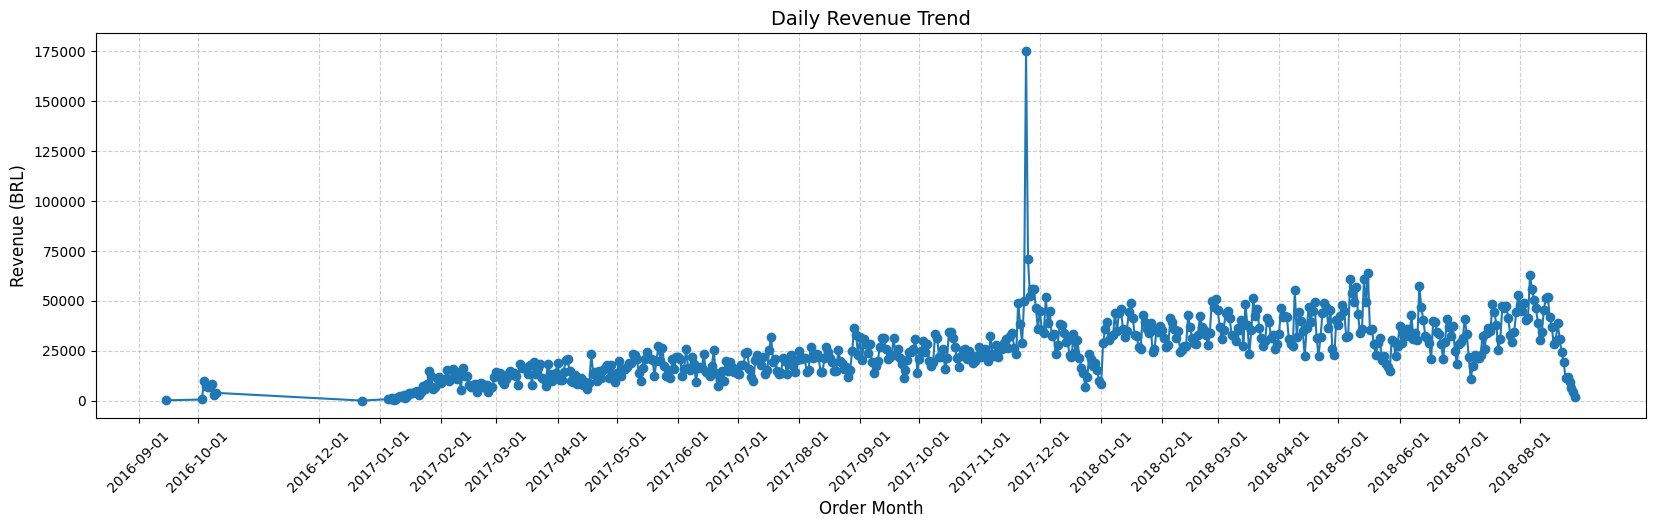

In [105]:
# Konversi order_date ke datetime untuk manipulasi tanggal
daily_revenue["order_date"] = pd.to_datetime(daily_revenue["order_date"])

# Ambil bulan dalam format YYYY-MM untuk xlabel
daily_revenue["order_month"] = daily_revenue["order_date"].dt.strftime("%Y-%m")

# Kelompokkan revenue berdasarkan bulan
monthly_revenue = daily_revenue.groupby("order_month")["total_revenue"].sum().reset_index()

# Plot grafik tren pendapatan bulanan
plt.figure(figsize=(20, 5))
plt.plot(daily_revenue["order_date"], daily_revenue["total_revenue"], marker='o', linestyle='-')

# Tambahkan judul dan label
plt.title("Daily Revenue Trend", fontsize=14)
plt.xlabel("Order Month", fontsize=12)
plt.ylabel("Revenue (BRL)", fontsize=12)

# Rotasi label sumbu X agar lebih terbaca
plt.xticks(monthly_revenue["order_month"], rotation=45)

# Tambahkan grid untuk memperjelas tren
plt.grid(True, linestyle="--", alpha=0.6)

# Tampilkan grafik
plt.show()

Terjadi lonjakan pemesanan yang luar biasa pada akhir November 2017.

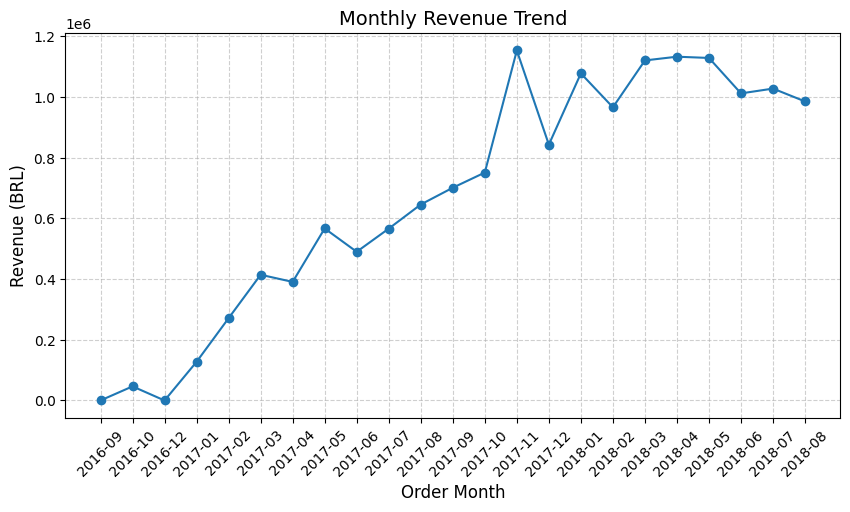

In [94]:
daily_revenue["order_date"] = pd.to_datetime(daily_revenue["order_date"])
daily_revenue["order_month"] = daily_revenue["order_date"].dt.to_period("M")
monthly_revenue = daily_revenue.groupby("order_month")["total_revenue"].sum().reset_index()
monthly_revenue["order_month"] = monthly_revenue["order_month"].astype(str)

plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue["order_month"], monthly_revenue["total_revenue"], marker='o', linestyle='-')
plt.title("Monthly Revenue Trend", fontsize=14)
plt.xlabel("Order Month", fontsize=12)
plt.ylabel("Revenue (BRL)", fontsize=12)

plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Pendapatan bulanan mengalami kenaikan selama periode Desember 2016 hingga Maret 2017, kemudian terjadi fluktuasi hingga akhir Mei 2017 yang diikuti kenaikan terus menerus hingga November 2017. Namun, mulai bulan Desember 2017 hingga April 2018, pendapatannya fluktuatif dan setelah April 2018 fluktuasinya mengarah ke penurunan.

### Pertanyaan 2:

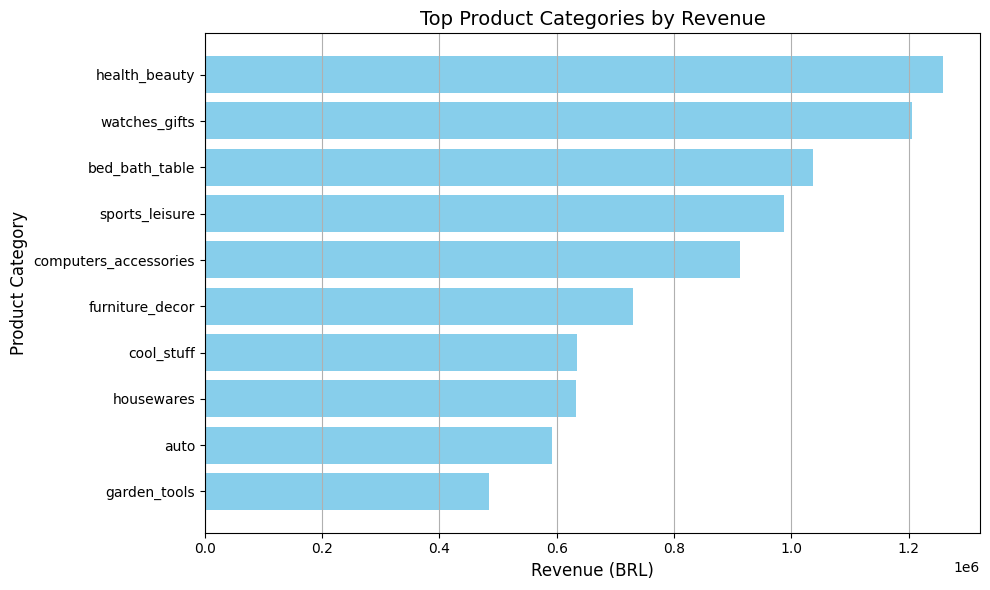

In [106]:
# Plot top categories
top_categories = category_revenue.sort_values(by="revenue", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_categories["product_category_name_english"], top_categories["revenue"], color="skyblue")
plt.xlabel("Revenue (BRL)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.title("Top Product Categories by Revenue", fontsize=14)

plt.gca().invert_yaxis()
plt.grid(axis="x")
plt.tight_layout()
plt.show()

Produk kategori health_beauty, watches_gifts, bed_bath_table menjadi produk yang menghasilkan pendapatan tertinggi dalam dua tahun terakhir.

### Pertanyaan 3:

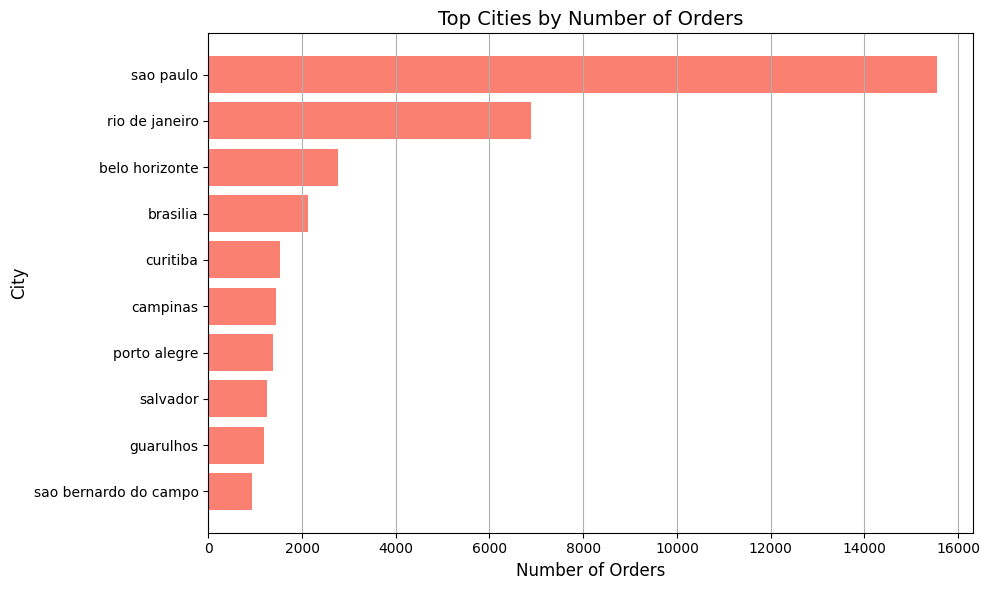

In [98]:
# Plot top cities
top_cities = city_orders.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_cities["customer_city"], top_cities["order_count"], color="salmon")
plt.xlabel("Number of Orders", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.title("Top Cities by Number of Orders", fontsize=14)

plt.gca().invert_yaxis()
plt.grid(axis="x")
plt.tight_layout()
plt.show()

Sao Paolo Menyumbangkan banyak sekali customer yang melakukan pemesanan di banding kota lain selama dua tahun terakhir.

### Pertanyaan 4:

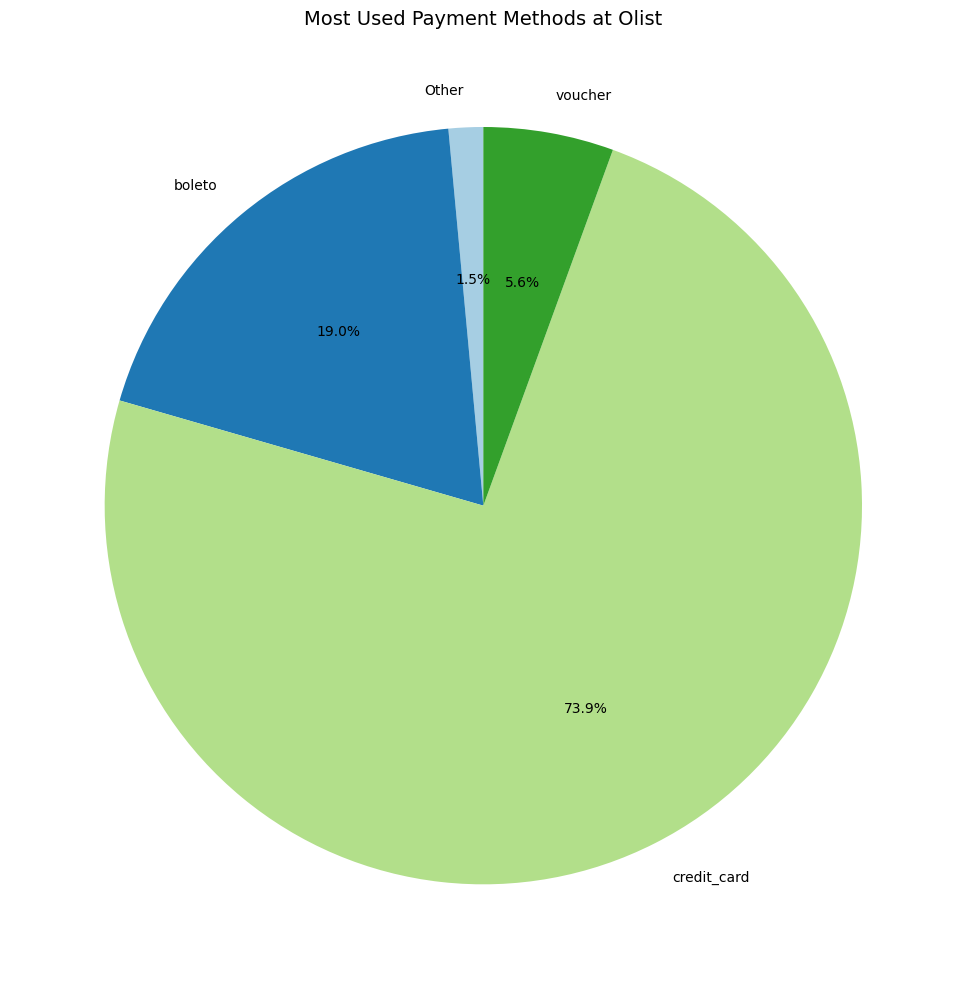

In [87]:
# Identify payment methods with less than 5% of total
threshold = 0.05
payment_counts["percentage"] = payment_counts["count"] / payment_counts["count"].sum()

# Merge categories with percentage below threshold into 'Other'
payment_counts.loc[payment_counts["percentage"] < threshold, "payment_type"] = "Other"

# Recalculate counts after merging
payment_counts_aggregated = payment_counts.groupby("payment_type")["count"].sum().reset_index()

# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(payment_counts_aggregated["count"],
        labels=payment_counts_aggregated["payment_type"],
        autopct="%1.1f%%", startangle=90,
        colors=plt.cm.Paired.colors)
plt.title("Most Used Payment Methods at Olist", fontsize=14)
plt.tight_layout()
plt.show()


Credit Card digunakan oleh 73% transaksi, total penggunaannya jauh di atas metode pembayaran yang lain.

## Analisis Lanjutan (Opsional)

#### Analisis RFM

In [107]:
# Pilih hanya pesanan yang sudah terkirim
orders_df = orders[orders["order_status"] == "delivered"].copy()

# Pilih kolom yang relevan
orders_df = orders_df[['order_id', 'customer_id', 'order_purchase_timestamp']]
order_payments_df = order_payments[['order_id', 'payment_value']].copy()

# Merge orders dengan order_payments
all_df = orders_df.merge(order_payments_df, on="order_id", how="left")
all_df = all_df.merge(customers[['customer_id', 'customer_unique_id']], on="customer_id", how="left")


In [108]:
# Agregasi data untuk RFM Analysis
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max",  # Tanggal order terakhir
    "order_id": "nunique",  # Frekuensi transaksi
    "payment_value": "sum"  # Total pengeluaran
})
# Rename kolom
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

In [109]:
rfm_df.sort_values(by='frequency', ascending=False).head()

,customer_id,max_order_timestamp,frequency,monetary
51431,8d50f5eadf50201ccdcedfb9e2ac8455,2018-08-20 19:14:26,15,879.27
22779,3e43e6105506432c953e165fb2acf44c,2018-02-27 18:36:39,9,1172.66
36706,6469f99c1f9dfae7733b25662e7f1782,2018-06-28 00:43:34,7,758.83
73921,ca77025e7201e3b30c44b472ff346268,2018-06-01 11:38:29,7,1122.72
10060,1b6c7548a2a1f9037c1fd3ddfed95f33,2018-02-14 13:22:12,7,959.01


In [110]:
# Menghitung recency (hari sejak transaksi terakhir)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

In [112]:
rfm_df.describe()

,frequency,monetary,recency
count,93358.000000,93358.000000,93358.000000
mean,1.033420,165.197003,237.478877
std,0.209097,226.314012,152.595054
min,1.000000,0.000000,0.000000
25%,1.000000,63.052500,114.000000
50%,1.000000,107.780000,218.000000
75%,1.000000,182.557500,346.000000
max,15.000000,13664.080000,713.000000


In [113]:
# Hapus kolom max_order_timestamp
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

<ipython-input-114-6e6f8314ec0a>:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-114-6e6f8314ec0a>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-114-6e6f8314ec0a>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-114-6e6f8314ec0a>:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




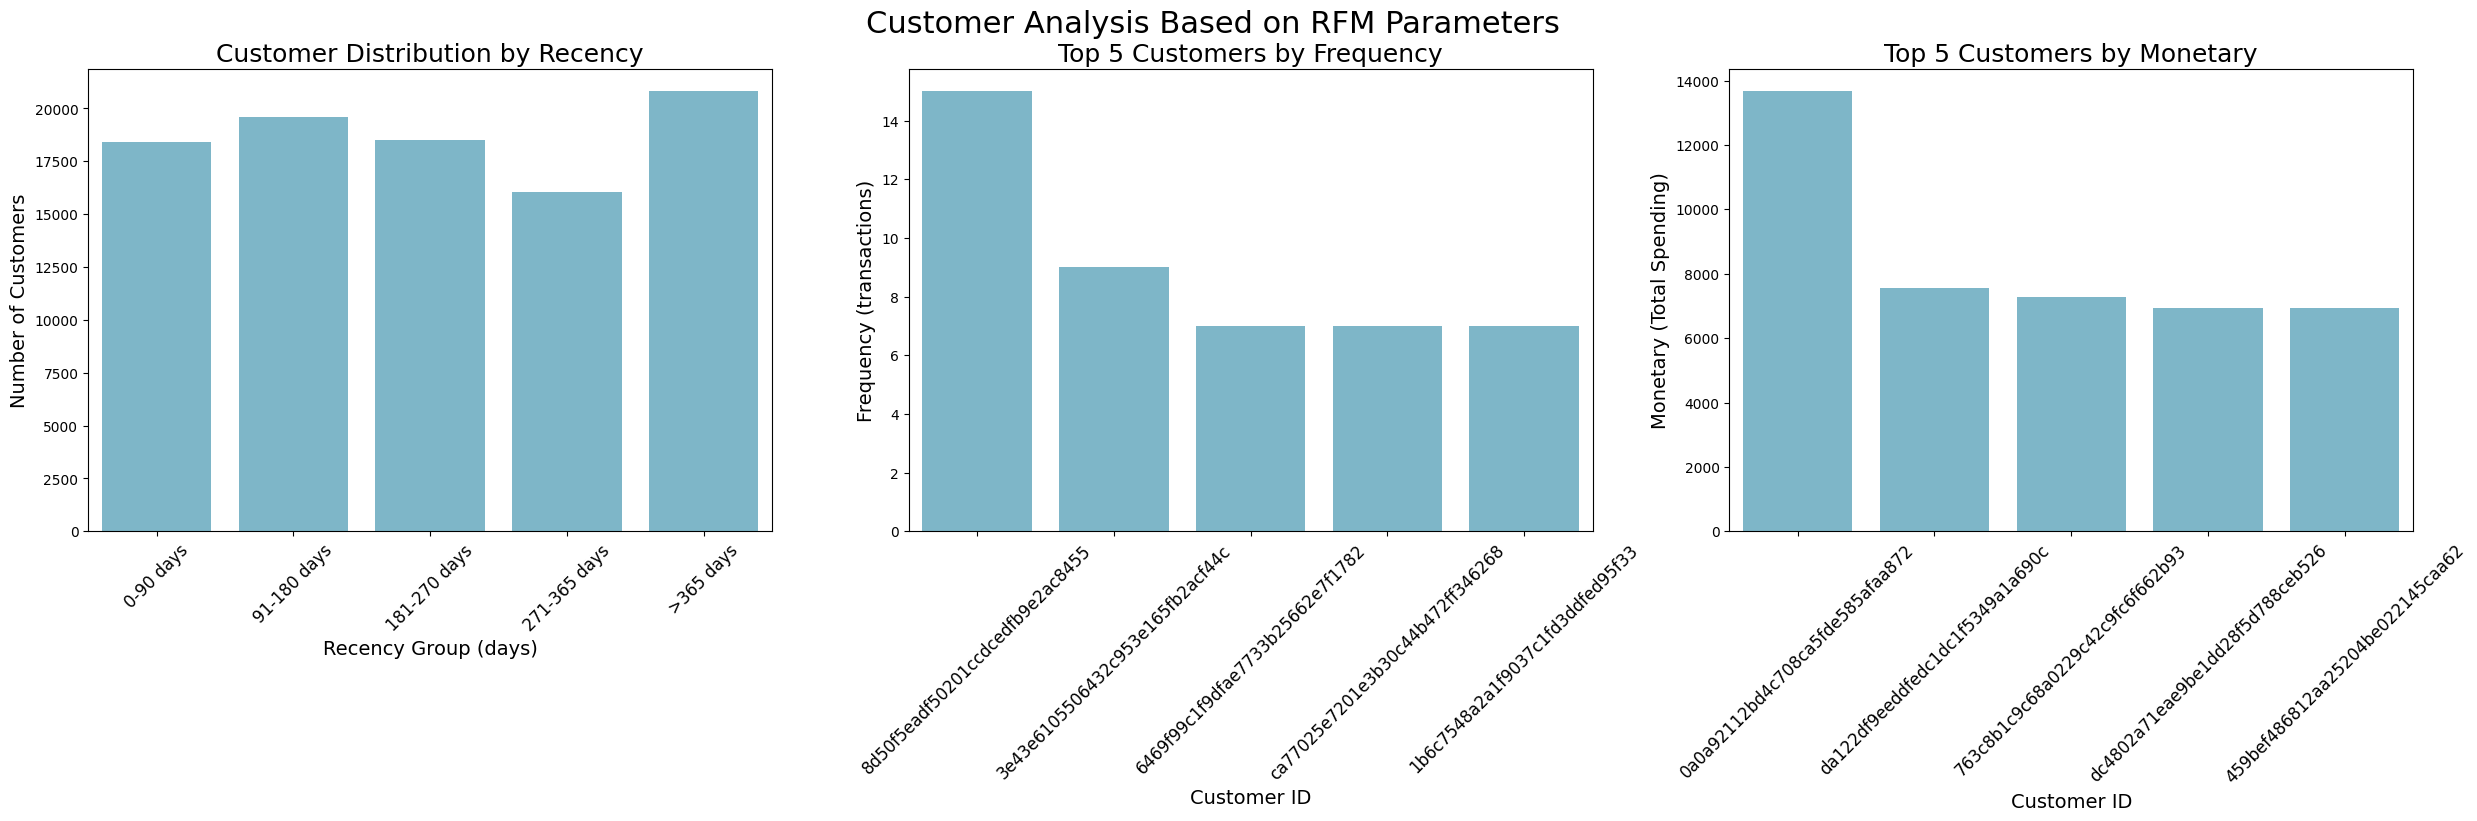

In [114]:
# Membuat kategori Recency dalam rentang hari
bins = [0, 90, 180, 270, 365, rfm_df["recency"].max()]
labels = ["0-90 days", "91-180 days", "181-270 days", "271-365 days", ">365 days"]
rfm_df["recency_group"] = pd.cut(rfm_df["recency"], bins=bins, labels=labels, right=False)

# Menghitung jumlah customer dalam setiap kelompok recency
recency_grouped = rfm_df.groupby("recency_group")["customer_id"].count().reset_index()
recency_grouped.rename(columns={"customer_id": "customer_count"}, inplace=True)

# Membuat visualisasi 3 barplot untuk Recency, Frequency, dan Monetary
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Warna untuk setiap barplot
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Barplot berdasarkan Recency (menggunakan kelompok rentang hari)
sns.barplot(y="customer_count", x="recency_group", data=recency_grouped, palette=colors, ax=ax[0])
ax[0].set_ylabel("Number of Customers", fontsize=14)
ax[0].set_xlabel("Recency Group (days)", fontsize=14)
ax[0].set_title("Customer Distribution by Recency", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=12, rotation=45)

# Barplot berdasarkan Frequency (pelanggan dengan transaksi terbanyak)
sns.barplot(y="frequency", x="customer_id",
            data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
            palette=colors, ax=ax[1])
ax[1].set_ylabel("Frequency (transactions)", fontsize=14)
ax[1].set_xlabel("Customer ID", fontsize=14)
ax[1].set_title("Top 5 Customers by Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=12, rotation=45)

# Barplot berdasarkan Monetary (pelanggan dengan total belanja tertinggi)
sns.barplot(y="monetary", x="customer_id",
            data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
            palette=colors, ax=ax[2])
ax[2].set_ylabel("Monetary (Total Spending)", fontsize=14)
ax[2].set_xlabel("Customer ID", fontsize=14)
ax[2].set_title("Top 5 Customers by Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=12, rotation=45)

# Menampilkan title utama
plt.suptitle("Customer Analysis Based on RFM Parameters", fontsize=22)

# Menampilkan plot
plt.show()


In [115]:
# Normalisasi ranking RFM
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

In [116]:
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

In [117]:
# Menghitung skor RFM
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm'] + 0.28*rfm_df['f_rank_norm'] + 0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)

Konstanta 0.15, 0.28, dan 0.57 adalah bobot yang menentukan seberapa besar pengaruh masing-masing komponen Recency (R), Frequency (F), dan Monetary (M) dalam perhitungan RFM Score.Konstanta ini bisa disesuaikan berdasarkan kebutuhan bisnis.

In [118]:
rfm_df.sort_values(by='RFM_score', ascending=False).head(10)

,customer_id,frequency,monetary,recency,recency_group,r_rank_norm,f_rank_norm,m_rank_norm,RFM_score
29112,4facc2e6fbc2bffab2fea92d2b4aa7e4,4,1760.75,16,0-90 days,96.95,99.97,99.69,4.97
80538,dc813062e0fc23409cd255f7f53c7074,6,1094.63,6,0-90 days,99.55,99.99,99.00,4.97
73127,c8460e4251689ba205045f3ea17884a1,4,4655.91,21,0-90 days,95.67,99.97,99.99,4.97
51431,8d50f5eadf50201ccdcedfb9e2ac8455,15,879.27,9,0-90 days,98.89,100.00,98.43,4.95
30077,525cda9909aa001ebed396f6e55eae01,2,1782.90,22,0-90 days,95.32,98.38,99.69,4.93
28543,4e1cce07cd5937c69dacac3c8b13d965,3,1294.60,30,0-90 days,92.77,99.85,99.30,4.92
20951,394ac4de8f3acb14253c177f0e15bc58,5,745.41,14,0-90 days,97.58,99.99,97.78,4.92
48074,839a04051a2c347397fd425d01fc3eb2,2,945.95,20,0-90 days,95.99,98.38,98.66,4.91
30901,54982b0c374191195d5f433c7cccae90,2,1098.34,23,0-90 days,94.94,98.38,99.00,4.91
76398,d132b863416f85f2abb1a988ca05dd12,3,1276.52,39,0-90 days,90.60,99.85,99.28,4.91


#### Segmentasi customer berdasarkan RFM_score

In [119]:
# Segmentasi pelanggan berdasarkan RFM Score
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers",
    np.where(rfm_df['RFM_score'] > 4, "High value customer",
    np.where(rfm_df['RFM_score'] > 3, "Medium value customer",
    np.where(rfm_df['RFM_score'] > 1.6, "Low value customers", "Lost customers"))))

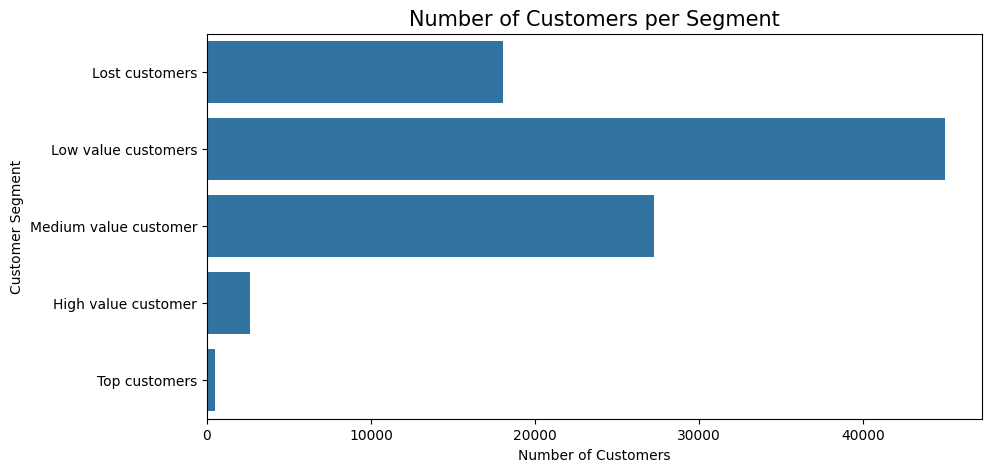

In [120]:
# Visualisasi Segmen Pelanggan
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "Lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

plt.figure(figsize=(10, 5))
sns.barplot(x="customer_id", y="customer_segment", data=customer_segment_df.sort_values(by="customer_segment", ascending=False))
plt.title("Number of Customers per Segment", fontsize=15)
plt.xlabel("Number of Customers")
plt.ylabel("Customer Segment")
plt.show()

## Conclusion

Perlu dilakukan analisis lanjutan pada hari di mana terjadi lonjakan pemesanan agar mengetahui apakah kejadian itu musiman atau hanya sekali terjadi atau untuk mencari insight yang mungkin saja memberi petunjuk untuk memicu keadaan seperti ini.

Perlu dilakukan analisis lanjutan terkait pendapatan per produk di setiap kota tidak hanya pendapatan total semua produk di masing-masing kota agar dapat mensuplai produk dengan jumlah optimal berdasarkan kesesuaian terhadap masing-masing kotanya.

Perlu dilakukan analisis lanjutan agar dapat merumuskan kampanye atau promosi yang tepat untuk menurunkan persentase lost customer dan low value customer, juga untuk meningkatkan persentase top customers dan high value customer.